<a href="https://colab.research.google.com/github/kirath2205/Neural-Network-Assignment-1/blob/pramurta/start_1a_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Part A Classification Problem***

In [2]:
import tensorflow
import pandas as pd
import time
import numpy as np
import statistics

# tensorflow libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input

# sklearn libraries are useful for preprocessing, performance measures, etc.
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## Read Data

In [3]:
df = pd.read_csv('./features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:
df['label'].value_counts()

rock         100
hiphop       100
pop          100
country      100
classical    100
disco        100
reggae       100
metal        100
blues        100
jazz         100
Name: label, dtype: int64

In [5]:
columns_to_drop = ['label','filename', 'length']

def prepare_dataset_question1(df, columns_to_drop, test_size, random_state):

    # Encode the labels from 0 to n_classes-1  
    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])
  
    # devide data to train and test
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # scale the training inputs
    x_train = df_train.drop(columns_to_drop,axis=1)
    y_train = df_train['label'].to_numpy()
    
    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)

    #scale and prepare testing data
    x_test = df_test.drop(columns_to_drop,axis=1)
    x_test_scaled = standard_scaler.transform(x_test)
    y_test = df_test['label'].to_numpy() 
  
    return x_train_scaled, y_train, x_test_scaled, y_test

In [6]:
X_train, y_train, X_test, y_test = prepare_dataset_question1(df, columns_to_drop, test_size=0.3, random_state=0)

# Question 1

The cell below contains the definitions of the functions build_model and train_model 

In [7]:
def build_model(total_classes,input_shape,dropout_probability=0.3,optimizer='adam', number_of_hidden_neurons=64, number_of_hidden_layers = 1, include_dropout=True):

  model=tf.keras.models.Sequential()
  model.add(keras.layers.Input(shape=input_shape))

  for i in range(number_of_hidden_layers):
    model.add(keras.layers.Dense(number_of_hidden_neurons, activation="relu"))
    if include_dropout:
        model.add(keras.layers.Dropout(dropout_probability))
    
  model.add(keras.layers.Dense(total_classes, activation='softmax'))
  model.compile(optimizer=optimizer,metrics=['accuracy'],loss=keras.losses.SparseCategoricalCrossentropy())

  return model

def train_model(model,epochs,X_train,y_train,X_test,y_test,batch_size=1,callbacks=[]):
    
  history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test,y_test),callbacks=callbacks)
  return history


**Part A**

The cell below trains the model for 50 epochs on the training and test dataset according to the configuration specified in the question. 

In [8]:
tf.keras.backend.clear_session()
history={}
model = build_model(total_classes = 10, input_shape = X_train[0].shape, number_of_hidden_neurons = 16, optimizer="adam", dropout_probability=0.3)
history = train_model(model = model, epochs = 50,X_train = X_train,y_train = y_train,X_test = X_test,y_test = y_test, batch_size=1)

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 2.3163 - accuracy: 0.1986 - val_loss: 1.8353 - val_accuracy: 0.3367
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 1.7935 - accuracy: 0.3529 - val_loss: 1.5529 - val_accuracy: 0.4800
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 1.5254 - accuracy: 0.4600 - val_loss: 1.3738 - val_accuracy: 0.5467
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 1.3875 - accuracy: 0.4843 - val_loss: 1.2726 - val_accuracy: 0.5467
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 1.2474 - accuracy: 0.5571 - val_loss: 1.2225 - val_accuracy: 0.5867
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 1.2277 - accuracy: 0.5714 - val_loss: 1.1611 - val_accuracy: 0.5900
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 1.1459 - accuracy: 0.5686 - val_loss: 1.1247 - val_accuracy: 0.5967
Epoch 

**Part B**

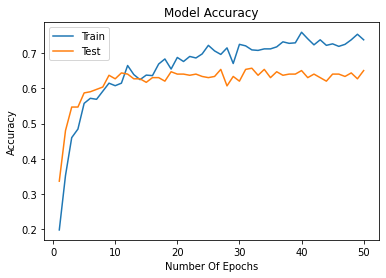

In [11]:
epochs=[x for x in range(1,51)]
plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number Of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


From the plot above, there are 2 trends we can observe:


*   **Epochs(1-20)**: Here, the train and test accuracies increase at a similar rate, with both of them being neck to neck.
*   **Epochs(20-50)**: Here, the train accurcacy increases at a greater rate than the test accuracy and there is a hint of divergence between them.






**Part C**

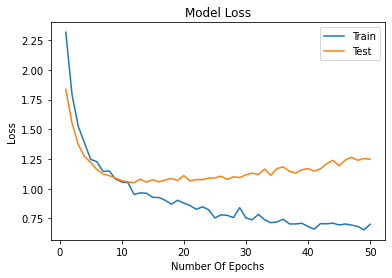

In [12]:
epochs=[x for x in range(1,51)]
plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number Of Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

From the graph above, the test error begins to converge from approximately **10 epochs**. 

# Question 2

**Parts A and B**

The TimeHistory class is used as a callback to calculate the time taken for the model to run each epoch

In [37]:
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

The cell below creates and runs different models with 3 fold cross validation over batch sizes 1, 4, 8, 16, 32, 64 and records the time to run every epoch using the TimeHistory callback. 

In [38]:
tf.keras.backend.clear_session()
kf = KFold(n_splits=3)

batch_sizes = [1,4,8,16,32,64]
epoch_times = {}
history = {}


k_fold = 1

for train_index, val_index in kf.split(X_train):
    X_training, X_val = X_train[train_index], X_train[val_index]
    y_training, y_val = y_train[train_index], y_train[val_index]
    for batch_size in batch_sizes:
        time_callback = TimeHistory()
        tf.keras.backend.clear_session()
        print('Model for k fold: '+str(k_fold)+" and batch size: "+str(batch_size))
        model = build_model(total_classes = 10, input_shape = X_training[0].shape, number_of_hidden_neurons = 16)
        history[(k_fold,batch_size)] = train_model(model,50,X_training,y_training,X_val,y_val,batch_size=batch_size,callbacks=[time_callback])
        epoch_times[(k_fold,batch_size)] = []
        for callback_time in time_callback.times:
            epoch_times[(k_fold,batch_size)].append(callback_time)
    k_fold+=1

Model for k fold: 1 and batch size: 1
Epoch 1/50
466/466 [==============================] - 1s 2ms/step - loss: 2.3583 - accuracy: 0.2060 - val_loss: 1.8954 - val_accuracy: 0.3889
Epoch 2/50
466/466 [==============================] - 1s 2ms/step - loss: 1.8067 - accuracy: 0.3755 - val_loss: 1.5938 - val_accuracy: 0.4829
Epoch 3/50
466/466 [==============================] - 1s 2ms/step - loss: 1.6386 - accuracy: 0.4292 - val_loss: 1.4413 - val_accuracy: 0.5043
Epoch 4/50
466/466 [==============================] - 1s 2ms/step - loss: 1.4366 - accuracy: 0.4871 - val_loss: 1.3410 - val_accuracy: 0.5214
Epoch 5/50
466/466 [==============================] - 1s 2ms/step - loss: 1.3097 - accuracy: 0.5000 - val_loss: 1.2818 - val_accuracy: 0.5427
Epoch 6/50
466/466 [==============================] - 1s 2ms/step - loss: 1.2517 - accuracy: 0.5730 - val_loss: 1.2254 - val_accuracy: 0.5427
Epoch 7/50
466/466 [==============================] - 1s 2ms/step - loss: 1.1883 - accuracy: 0.5408 - val_loss

The cell below calculates the mean cross validation accuracy over the 3 cross folds for every epoch and batch size. 

In [41]:
mean_cross_val_accuracy = {}
num_epochs = 50
for batch_size in batch_sizes:
    mean_cross_val_accuracy[batch_size] = []


for batch_size in batch_sizes:
    for epoch in range(num_epochs):
        sum_for_3_folds = 0
        for kFold in [1,2,3]:
            sum_for_3_folds+=history[(kFold,batch_size)].history['val_accuracy'][epoch]
        mean_cross_val_accuracy[batch_size].append(sum_for_3_folds/3)


Plotting the mean cross validation accuracies for every batch size over 50 epochs

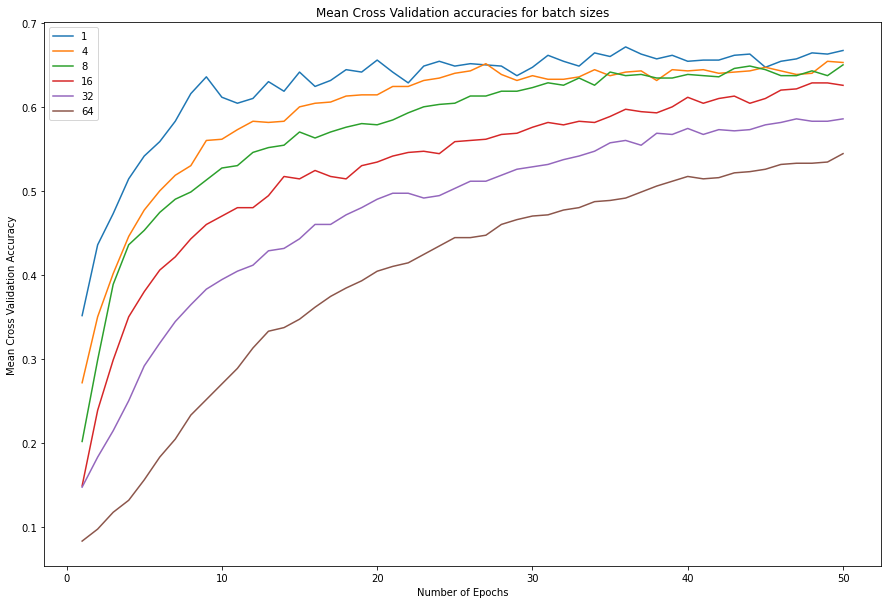

In [42]:
epochs=[x for x in range(1,51)]
plt.figure(figsize=(15, 10))

for batch_size in batch_sizes:
    plt.plot(epochs, mean_cross_val_accuracy[batch_size])

plt.title('Mean Cross Validation accuracies for batch sizes')
plt.ylabel('Mean Cross Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['1', '4', '8', '16', '32', '64'], loc='upper left')



plt.show()


From the graph present above, we can conclude that models trained with batch sizes 1, 4 and 8 performs better than 16, 32, and 64 due to higher trend in mean cross validation accuracy over 50 epochs. 

The cell below calculates the mean time over 3 cross folds for every epoch in different batch sizes. 

In [43]:
mean_times = {}
num_epochs = 50
for batch_size in batch_sizes:
    mean_times[batch_size] = []


for batch_size in batch_sizes:
    for epoch in range(num_epochs):
        sum_for_3_folds = 0
        for kFold in [1,2,3]:
            sum_for_3_folds+=epoch_times[(kFold,batch_size)][epoch]
        mean_times[batch_size].append(sum_for_3_folds/3)

The cell below computes the median time for all the mean times calculated for different epochs in different batch sizes

In [44]:
import statistics
median_times_by_batch_size = []
for batch_size in mean_times.keys():
    median_times_by_batch_size.append([batch_size, statistics.median(mean_times[batch_size])])

median_epoch_time_table=pd.DataFrame(median_times_by_batch_size,columns=['Batch_size','Median_time'])

median_epoch_time_table

,Batch_size,Median_time
0,1,0.982278
1,4,0.303613
2,8,0.191541
3,16,0.117221
4,32,0.074724
5,64,0.062997


**Part C** 

As stated previously

In [20]:
optimal_batch_size = 8

**Part D**

Difference between mini batch gradient descent and stochastic gradient descent

**Part E**

The cell below trains the model on train and test data with the optimal batch size 

In [21]:
tf.keras.backend.clear_session()
model_2e = build_model(10,X_train[0].shape,dropout_probability=0.3,optimizer='adam', number_of_hidden_neurons=16, number_of_hidden_layers = 1, include_dropout=True)
history = train_model(model_2e,50,X_train,y_train,X_test,y_test,batch_size=optimal_batch_size)

Epoch 1/50
88/88 [==============================] - 1s 4ms/step - loss: 2.4670 - accuracy: 0.1457 - val_loss: 2.1638 - val_accuracy: 0.2367
Epoch 2/50
88/88 [==============================] - 0s 3ms/step - loss: 2.0404 - accuracy: 0.3114 - val_loss: 1.9378 - val_accuracy: 0.3267
Epoch 3/50
88/88 [==============================] - 0s 2ms/step - loss: 1.8320 - accuracy: 0.3614 - val_loss: 1.8122 - val_accuracy: 0.3567
Epoch 4/50
88/88 [==============================] - 0s 2ms/step - loss: 1.7160 - accuracy: 0.4100 - val_loss: 1.7054 - val_accuracy: 0.3967
Epoch 5/50
88/88 [==============================] - 0s 2ms/step - loss: 1.5982 - accuracy: 0.4143 - val_loss: 1.6295 - val_accuracy: 0.4333
Epoch 6/50
88/88 [==============================] - 0s 2ms/step - loss: 1.5871 - accuracy: 0.4200 - val_loss: 1.5677 - val_accuracy: 0.4433
Epoch 7/50
88/88 [==============================] - 0s 3ms/step - loss: 1.4878 - accuracy: 0.4686 - val_loss: 1.5165 - val_accuracy: 0.4667
Epoch 8/50
88/88 [==

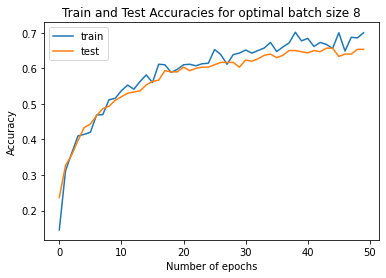

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train and Test Accuracies for optimal batch size '+str(optimal_batch_size))
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Question 3

**Part A**

Trains models with 3 fold cross validation over different number of neurons(8, 16, 32, 64). 

In [23]:
tf.keras.backend.clear_session()

kf = KFold(n_splits=3)

neurons_list = [8,16,32,64]

history = {}



k_fold = 1

for train_index, val_index in kf.split(X_train):
    X_training, X_val = X_train[train_index], X_train[val_index]
    y_training, y_val = y_train[train_index], y_train[val_index]
    for neuron in neurons_list:
        tf.keras.backend.clear_session()
        print('Model for k-fold '+str(k_fold)+" and number of neurons: "+str(neuron))
        model = build_model(10,X_train[0].shape,number_of_hidden_neurons=neuron)
        history[(k_fold,neuron)] = train_model(model,50,X_training,y_training,X_val,y_val,batch_size=optimal_batch_size)
    k_fold+=1

Model for k-fold 1 and number of neurons: 8
Epoch 1/50
59/59 [==============================] - 1s 5ms/step - loss: 2.6293 - accuracy: 0.0622 - val_loss: 2.4108 - val_accuracy: 0.1325
Epoch 2/50
59/59 [==============================] - 0s 2ms/step - loss: 2.3753 - accuracy: 0.0987 - val_loss: 2.2888 - val_accuracy: 0.1368
Epoch 3/50
59/59 [==============================] - 0s 2ms/step - loss: 2.3114 - accuracy: 0.1266 - val_loss: 2.2056 - val_accuracy: 0.1538
Epoch 4/50
59/59 [==============================] - 0s 2ms/step - loss: 2.1671 - accuracy: 0.1953 - val_loss: 2.1179 - val_accuracy: 0.2863
Epoch 5/50
59/59 [==============================] - 0s 3ms/step - loss: 2.1065 - accuracy: 0.2382 - val_loss: 2.0069 - val_accuracy: 0.3419
Epoch 6/50
59/59 [==============================] - 0s 3ms/step - loss: 1.9939 - accuracy: 0.2790 - val_loss: 1.9237 - val_accuracy: 0.3675
Epoch 7/50
59/59 [==============================] - 0s 3ms/step - loss: 1.9610 - accuracy: 0.2983 - val_loss: 1.8460

The cell below calculates the mean cross validation accuracy over the 3 cross folds for every epoch and hidden neurons(8, 16, 32, 64). 

In [24]:
mean_cross_val_accuracy = {}
num_epochs = 50
for neuron in neurons_list:
    mean_cross_val_accuracy[neuron] = []


for neuron in neurons_list:
    for epoch in range(num_epochs):
        sum_for_3_folds = 0
        for kFold in [1,2,3]:
            sum_for_3_folds+=history[(kFold,neuron)].history['val_accuracy'][epoch]
        mean_cross_val_accuracy[neuron].append(sum_for_3_folds/3)


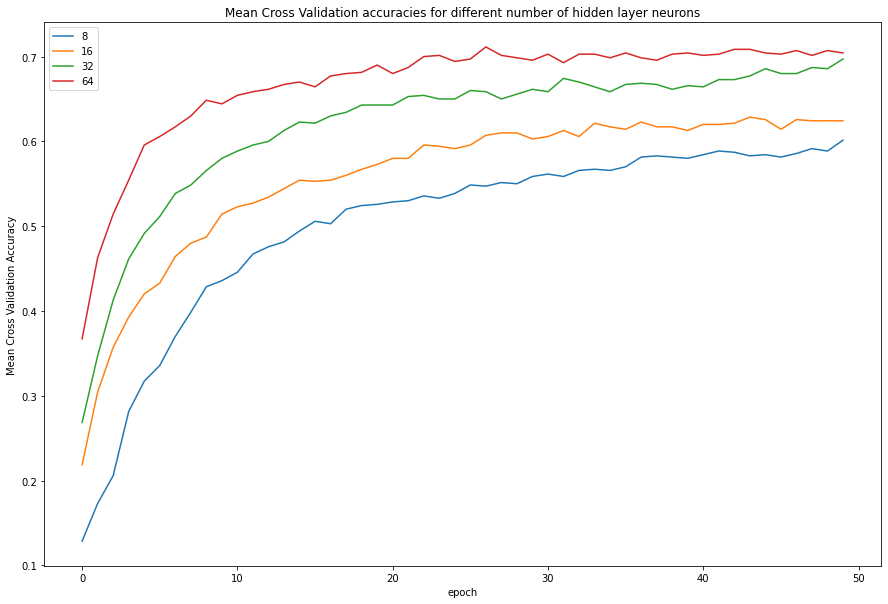

In [25]:
epochs=[x for x in range(1,51)]
plt.figure(figsize=(15, 10))

for neuron in neurons_list:
    plt.plot(mean_cross_val_accuracy[neuron])

plt.title('Mean Cross Validation accuracies for different number of hidden layer neurons')
plt.ylabel('Mean Cross Validation Accuracy')
plt.xlabel('epoch')
plt.legend(['8', '16', '32', '64'], loc='upper left')

plt.show()



**Part B**

From the graph above, we can clearly see that the model with number of hidden neurons 64 gives the highest mean cross validation accuracy over 50 epochs. **Hence, the optimal number of neurons = 64**

In [26]:
optimal_number_of_neurons = 64

**Part C**

Training the model with optimal batch size and number of neurons

In [27]:
tf.keras.backend.clear_session()
history={}
model = build_model(10,X_train[0].shape,number_of_hidden_neurons=optimal_number_of_neurons)
history = train_model(model,50,X_train,y_train,X_test,y_test,batch_size=optimal_batch_size)

Epoch 1/50
88/88 [==============================] - 1s 4ms/step - loss: 2.1224 - accuracy: 0.2700 - val_loss: 1.6487 - val_accuracy: 0.3833
Epoch 2/50
88/88 [==============================] - 0s 3ms/step - loss: 1.5632 - accuracy: 0.4371 - val_loss: 1.4118 - val_accuracy: 0.4867
Epoch 3/50
88/88 [==============================] - 0s 2ms/step - loss: 1.3396 - accuracy: 0.5314 - val_loss: 1.2858 - val_accuracy: 0.5300
Epoch 4/50
88/88 [==============================] - 0s 2ms/step - loss: 1.2014 - accuracy: 0.5700 - val_loss: 1.2240 - val_accuracy: 0.5633
Epoch 5/50
88/88 [==============================] - 0s 2ms/step - loss: 1.1195 - accuracy: 0.6171 - val_loss: 1.1538 - val_accuracy: 0.6000
Epoch 6/50
88/88 [==============================] - 0s 3ms/step - loss: 1.0316 - accuracy: 0.6500 - val_loss: 1.1084 - val_accuracy: 0.6033
Epoch 7/50
88/88 [==============================] - 0s 2ms/step - loss: 0.9643 - accuracy: 0.6700 - val_loss: 1.0723 - val_accuracy: 0.6400
Epoch 8/50
88/88 [==

Plotting the train and test accuracies with the optimal number of neurons(64)

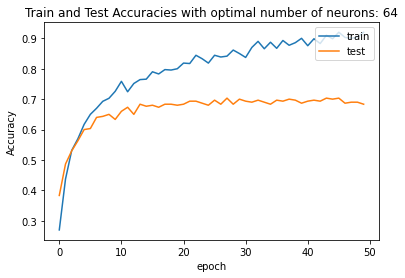

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train and Test Accuracies with optimal number of neurons: '+ str(optimal_number_of_neurons))
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Part D**

The other parameters which could be tuned are the learning rate, activation function in the hidden layer(tanh instead of relu) etc. 

# Question 4

**Part A**

Training a 3-layer network with two hidden layers with ReLU activation, each consisting of the optimal number of neurons with a dropout probability of 0.3 for each hidden layer),
and a batch size of 1

In [31]:
tf.keras.backend.clear_session()
history={}
model = build_model(10,X_train[0].shape,dropout_probability=0.3,optimizer='adam', number_of_hidden_neurons=optimal_number_of_neurons, number_of_hidden_layers = 2)
history = train_model(model,50,X_train,y_train,X_test,y_test,batch_size=1,callbacks=[])

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 1.9095 - accuracy: 0.3171 - val_loss: 1.4569 - val_accuracy: 0.4867
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 1.4025 - accuracy: 0.5114 - val_loss: 1.2189 - val_accuracy: 0.5867
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 1.2177 - accuracy: 0.5857 - val_loss: 1.1463 - val_accuracy: 0.5800
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 1.0729 - accuracy: 0.6414 - val_loss: 1.0740 - val_accuracy: 0.6067
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 1.0178 - accuracy: 0.6357 - val_loss: 1.0150 - val_accuracy: 0.6467
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 0.8836 - accuracy: 0.6743 - val_loss: 0.9834 - val_accuracy: 0.6533
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 0.8514 - accuracy: 0.7029 - val_loss: 1.0383 - val_accuracy: 0.6367
Epoch 

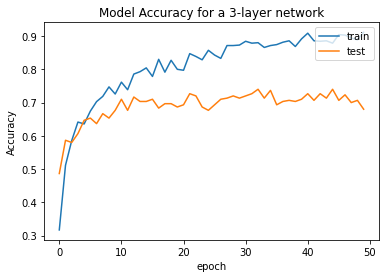

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy for a 3-layer network')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**Part B**

Compare and comment on the performances of the 2 layer and 3 layer network

# Question 5

**Part A**

Training the original 2 layer network without dropout

In [33]:
tf.keras.backend.clear_session()
history={}
without_dropout_model = build_model(total_classes=10,input_shape=X_train[0].shape, number_of_hidden_neurons=16, number_of_hidden_layers = 1, include_dropout=False)
history=train_model(model=without_dropout_model, epochs=50,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test, batch_size=1)

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 2.0077 - accuracy: 0.2714 - val_loss: 1.6979 - val_accuracy: 0.3733
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 1.4335 - accuracy: 0.4929 - val_loss: 1.4021 - val_accuracy: 0.4967
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 1.1829 - accuracy: 0.5900 - val_loss: 1.2506 - val_accuracy: 0.5700
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 1.0237 - accuracy: 0.6600 - val_loss: 1.1911 - val_accuracy: 0.5933
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 0.9168 - accuracy: 0.6986 - val_loss: 1.1761 - val_accuracy: 0.5867
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 0.8334 - accuracy: 0.7114 - val_loss: 1.1235 - val_accuracy: 0.6067
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 0.7709 - accuracy: 0.7471 - val_loss: 1.0951 - val_accuracy: 0.6333
Epoch 

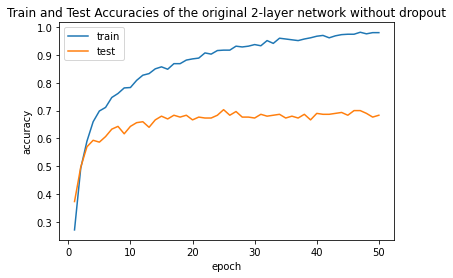

In [35]:
epochs=[x for x in range(1,51)]
plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,history.history['val_accuracy'])
plt.title('Train and Test Accuracies of the original 2-layer network without dropout')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


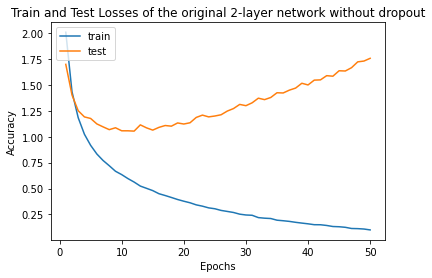

In [36]:
epochs=[x for x in range(1,51)]
plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('Train and Test Losses of the original 2-layer network without dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**Part B**

By removing dropouts, we can clearly see from the loss curve that the model has overfit as with increasing epochs, the train loss decreases but the test loss increases

**Part C**

L2 Regularization could be used to reduce overfitting. 